In [ ]:
import pandas as pd
import numpy as np
import requests
%pip install Tiingo
from tiingo import TiingoClient
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import OLS
from scipy.stats import pearsonr, spearmanr, t, norm
from datetime import datetime
import seaborn as sns
from google.colab import drive
import re
import scipy
from scipy import stats
import math
from math import atanh, pow
from numpy import tanh
pd.options.display.max_columns = None
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Install the client
config = {}

config['session'] = True
config['api_key'] = ""
client = TiingoClient(config)

In [ ]:
etfs = ['KIE', 'KBE', 'KRE', 'XHB', 'VNQ', 'IAT','HYG', 'LQD']

def drop_cols(df, str1):
    df = df.drop(columns=[str1+'_close', str1+'_high', str1+'_low', str1+'_open', str1+'_adjHigh', str1+'_adjLow',
                        str1+'_volume', str1+'_divCash', str1+'_splitFactor', str1+'_adjOpen', str1+'_adjVolume'])
    return df

df_list = []
for i in etfs:
  dataframe = client.get_dataframe(i, startDate='2007-04-13', endDate='2024-04-15', frequency='daily')
  dataframe = dataframe.add_prefix(i.lower()+'_')
  dataframe = drop_cols(dataframe, i.lower())
  df_list.append(dataframe)

df = pd.concat(df_list, axis=1)
df

,kie_adjClose,kbe_adjClose,kre_adjClose,xhb_adjClose,vnq_adjClose,iat_adjClose,hyg_adjClose,lqd_adjClose
date,,,,,,,,
2007-04-13 00:00:00+00:00,14.035181,38.026428,31.115048,27.712079,39.039829,32.576577,35.425159,54.563246
2007-04-16 00:00:00+00:00,14.189226,38.762311,31.698000,28.125440,39.088813,33.167684,35.411564,54.609443
2007-04-17 00:00:00+00:00,14.289477,38.748807,31.664878,28.488186,39.598241,33.095438,35.394570,54.907154
2007-04-18 00:00:00+00:00,14.348161,39.329465,31.724498,29.078702,39.353324,33.430399,35.404766,54.922553
2007-04-19 00:00:00+00:00,14.321264,39.288954,31.479393,29.061830,39.088813,33.423831,35.527121,54.958483
...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+00:00,50.110000,46.190000,49.350000,108.400000,85.970000,42.342848,76.402472,106.743850
2024-04-10 00:00:00+00:00,49.780000,44.280000,46.900000,104.380000,82.410000,40.637634,75.729148,105.225600
2024-04-11 00:00:00+00:00,48.430000,44.230000,46.940000,104.800000,82.690000,40.578150,75.659835,105.007290


In [ ]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
for i in list(df.columns):
  df[i[:3].lower()+'_ret'] = df[i[:3].lower()+'_adjClose'].pct_change()
  df[i[:3].lower()+'_ret_20d_future'] = df[i[:3].lower()+'_adjClose'].pct_change(20).shift(-20) #make future returns
  df[i[:3].lower()+'_ret_20d_future'] = df[i[:3].lower()+'_ret_20d_future'][::20] #ensure that there is no overlapping data

df

,kie_adjClose,kbe_adjClose,kre_adjClose,xhb_adjClose,vnq_adjClose,iat_adjClose,hyg_adjClose,lqd_adjClose,kie_ret,kie_ret_20d_future,kbe_ret,kbe_ret_20d_future,kre_ret,kre_ret_20d_future,xhb_ret,xhb_ret_20d_future,vnq_ret,vnq_ret_20d_future,iat_ret,iat_ret_20d_future,hyg_ret,hyg_ret_20d_future,lqd_ret,lqd_ret_20d_future
date,,,,,,,,,,,,,,,,,,,,,,,,
2007-04-13 00:00:00+00:00,14.035181,38.026428,31.115048,27.712079,39.039829,32.576577,35.425159,54.563246,NaN,0.069512,NaN,0.038706,NaN,0.019374,NaN,0.035616,NaN,-0.005646,NaN,0.033266,NaN,0.016542,NaN,0.012133
2007-04-16 00:00:00+00:00,14.189226,38.762311,31.698000,28.125440,39.088813,33.167684,35.411564,54.609443,0.010976,NaN,0.019352,NaN,0.018735,NaN,0.014916,NaN,0.001255,NaN,0.018145,NaN,-0.000384,NaN,0.000847,NaN
2007-04-17 00:00:00+00:00,14.289477,38.748807,31.664878,28.488186,39.598241,33.095438,35.394570,54.907154,0.007065,NaN,-0.000348,NaN,-0.001045,NaN,0.012897,NaN,0.013033,NaN,-0.002178,NaN,-0.000480,NaN,0.005452,NaN
2007-04-18 00:00:00+00:00,14.348161,39.329465,31.724498,29.078702,39.353324,33.430399,35.404766,54.922553,0.004107,NaN,0.014985,NaN,0.001883,NaN,0.020728,NaN,-0.006185,NaN,0.010121,NaN,0.000288,NaN,0.000280,NaN
2007-04-19 00:00:00+00:00,14.321264,39.288954,31.479393,29.061830,39.088813,33.423831,35.527121,54.958483,-0.001875,NaN,-0.001030,NaN,-0.007726,NaN,-0.000580,NaN,-0.006721,NaN,-0.000196,NaN,0.003456,NaN,0.000654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+00:00,50.110000,46.190000,49.350000,108.400000,85.970000,42.342848,76.402472,106.743850,-0.016680,NaN,0.002605,NaN,0.006527,NaN,-0.001014,NaN,0.013319,NaN,0.002347,NaN,0.002078,NaN,0.005139,NaN
2024-04-10 00:00:00+00:00,49.780000,44.280000,46.900000,104.380000,82.410000,40.637634,75.729148,105.225600,-0.006586,NaN,-0.041351,NaN,-0.049645,NaN,-0.037085,NaN,-0.041410,NaN,-0.040272,NaN,-0.008813,NaN,-0.014223,NaN
2024-04-11 00:00:00+00:00,48.430000,44.230000,46.940000,104.800000,82.690000,40.578150,75.659835,105.007290,-0.027119,NaN,-0.001129,NaN,0.000853,NaN,0.004024,NaN,0.003398,NaN,-0.001464,NaN,-0.000915,NaN,-0.002075,NaN


In [ ]:
pd.options.display.max_columns = None
df

,kie_adjClose,kbe_adjClose,kre_adjClose,xhb_adjClose,vnq_adjClose,iat_adjClose,hyg_adjClose,lqd_adjClose,kie_ret,kie_ret_20d_future,kbe_ret,kbe_ret_20d_future,kre_ret,kre_ret_20d_future,xhb_ret,xhb_ret_20d_future,vnq_ret,vnq_ret_20d_future,iat_ret,iat_ret_20d_future,hyg_ret,hyg_ret_20d_future,lqd_ret,lqd_ret_20d_future
date,,,,,,,,,,,,,,,,,,,,,,,,
2007-04-13 00:00:00+00:00,14.035181,38.026428,31.115048,27.712079,39.039829,32.576577,35.425159,54.563246,NaN,0.069512,NaN,0.038706,NaN,0.019374,NaN,0.035616,NaN,-0.005646,NaN,0.033266,NaN,0.016542,NaN,0.012133
2007-04-16 00:00:00+00:00,14.189226,38.762311,31.698000,28.125440,39.088813,33.167684,35.411564,54.609443,0.010976,NaN,0.019352,NaN,0.018735,NaN,0.014916,NaN,0.001255,NaN,0.018145,NaN,-0.000384,NaN,0.000847,NaN
2007-04-17 00:00:00+00:00,14.289477,38.748807,31.664878,28.488186,39.598241,33.095438,35.394570,54.907154,0.007065,NaN,-0.000348,NaN,-0.001045,NaN,0.012897,NaN,0.013033,NaN,-0.002178,NaN,-0.000480,NaN,0.005452,NaN
2007-04-18 00:00:00+00:00,14.348161,39.329465,31.724498,29.078702,39.353324,33.430399,35.404766,54.922553,0.004107,NaN,0.014985,NaN,0.001883,NaN,0.020728,NaN,-0.006185,NaN,0.010121,NaN,0.000288,NaN,0.000280,NaN
2007-04-19 00:00:00+00:00,14.321264,39.288954,31.479393,29.061830,39.088813,33.423831,35.527121,54.958483,-0.001875,NaN,-0.001030,NaN,-0.007726,NaN,-0.000580,NaN,-0.006721,NaN,-0.000196,NaN,0.003456,NaN,0.000654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+00:00,50.110000,46.190000,49.350000,108.400000,85.970000,42.342848,76.402472,106.743850,-0.016680,NaN,0.002605,NaN,0.006527,NaN,-0.001014,NaN,0.013319,NaN,0.002347,NaN,0.002078,NaN,0.005139,NaN
2024-04-10 00:00:00+00:00,49.780000,44.280000,46.900000,104.380000,82.410000,40.637634,75.729148,105.225600,-0.006586,NaN,-0.041351,NaN,-0.049645,NaN,-0.037085,NaN,-0.041410,NaN,-0.040272,NaN,-0.008813,NaN,-0.014223,NaN
2024-04-11 00:00:00+00:00,48.430000,44.230000,46.940000,104.800000,82.690000,40.578150,75.659835,105.007290,-0.027119,NaN,-0.001129,NaN,0.000853,NaN,0.004024,NaN,0.003398,NaN,-0.001464,NaN,-0.000915,NaN,-0.002075,NaN


# Calculating future 20 day returns

In [ ]:
df['hyg_vol'] =  np.sqrt(np.log(df['hyg_adjClose']).diff().rolling(20).var()*252)
df['lqd_vol'] =  np.sqrt(np.log(df['lqd_adjClose']).diff().rolling(20).var()*252)
df['hyg_lqd_vol_ratio'] = df['hyg_vol'] / df['lqd_vol']
df['lqd_ret_adj'] = 1 + (df['lqd_ret'] * df['hyg_lqd_vol_ratio'])
df['lqd_ret_adj_series'] = df['lqd_ret_adj'].cumprod()
df['lqd_ret_adj_series'] =  df['lqd_ret_adj_series'] * df['lqd_adjClose'].iloc[0]
df['lqd_adj_ret_20d'] = df['lqd_ret_adj_series'].pct_change(20).shift(-20) #make future adjusted returns
df['lqd_adj_ret_20d'] = df['lqd_adj_ret_20d'][::20] #ensure there is no overlapping data
df['hyg_lqd_20d_ret_spread'] = df['hyg_ret_20d_future'] - df['lqd_adj_ret_20d']
df['hyg_lqd_20d_ret_spread_chng'] = df['hyg_lqd_20d_ret_spread'].diff(20)
df

,kie_adjClose,kbe_adjClose,kre_adjClose,xhb_adjClose,vnq_adjClose,iat_adjClose,hyg_adjClose,lqd_adjClose,kie_ret,kie_ret_20d_future,kbe_ret,kbe_ret_20d_future,kre_ret,kre_ret_20d_future,xhb_ret,xhb_ret_20d_future,vnq_ret,vnq_ret_20d_future,iat_ret,iat_ret_20d_future,hyg_ret,hyg_ret_20d_future,lqd_ret,lqd_ret_20d_future,hyg_vol,lqd_vol,hyg_lqd_vol_ratio,lqd_ret_adj,lqd_ret_adj_series,lqd_adj_ret_20d,hyg_lqd_20d_ret_spread,hyg_lqd_20d_ret_spread_chng
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-04-13 00:00:00+00:00,14.035181,38.026428,31.115048,27.712079,39.039829,32.576577,35.425159,54.563246,NaN,0.069512,NaN,0.038706,NaN,0.019374,NaN,0.035616,NaN,-0.005646,NaN,0.033266,NaN,0.016542,NaN,0.012133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-16 00:00:00+00:00,14.189226,38.762311,31.698000,28.125440,39.088813,33.167684,35.411564,54.609443,0.010976,NaN,0.019352,NaN,0.018735,NaN,0.014916,NaN,0.001255,NaN,0.018145,NaN,-0.000384,NaN,0.000847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-17 00:00:00+00:00,14.289477,38.748807,31.664878,28.488186,39.598241,33.095438,35.394570,54.907154,0.007065,NaN,-0.000348,NaN,-0.001045,NaN,0.012897,NaN,0.013033,NaN,-0.002178,NaN,-0.000480,NaN,0.005452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-18 00:00:00+00:00,14.348161,39.329465,31.724498,29.078702,39.353324,33.430399,35.404766,54.922553,0.004107,NaN,0.014985,NaN,0.001883,NaN,0.020728,NaN,-0.006185,NaN,0.010121,NaN,0.000288,NaN,0.000280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-19 00:00:00+00:00,14.321264,39.288954,31.479393,29.061830,39.088813,33.423831,35.527121,54.958483,-0.001875,NaN,-0.001030,NaN,-0.007726,NaN,-0.000580,NaN,-0.006721,NaN,-0.000196,NaN,0.003456,NaN,0.000654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+00:00,50.110000,46.190000,49.350000,108.400000,85.970000,42.342848,76.402472,106.743850,-0.016680,NaN,0.002605,NaN,0.006527,NaN,-0.001014,NaN,0.013319,NaN,0.002347,NaN,0.002078,NaN,0.005139,NaN,0.040814,0.062144,0.656755,1.003375,219.164668,NaN,NaN,NaN
2024-04-10 00:00:00+00:00,49.780000,44.280000,46.900000,104.380000,82.410000,40.637634,75.729148,105.225600,-0.006586,NaN,-0.041351,NaN,-0.049645,NaN,-0.037085,NaN,-0.041410,NaN,-0.040272,NaN,-0.008813,NaN,-0.014223,NaN,0.051563,0.078873,0.653744,0.990702,217.126788,NaN,NaN,NaN
2024-04-11 00:00:00+00:00,48.430000,44.230000,46.940000,104.800000,82.690000,40.578150,75.659835,105.007290,-0.027119,NaN,-0.001129,NaN,0.000853,NaN,0.004024,NaN,0.003398,NaN,-0.001464,NaN,-0.000915,NaN,-0.002075,NaN,0.051513,0.078958,0.652408,0.998646,216.832897,NaN,NaN,NaN


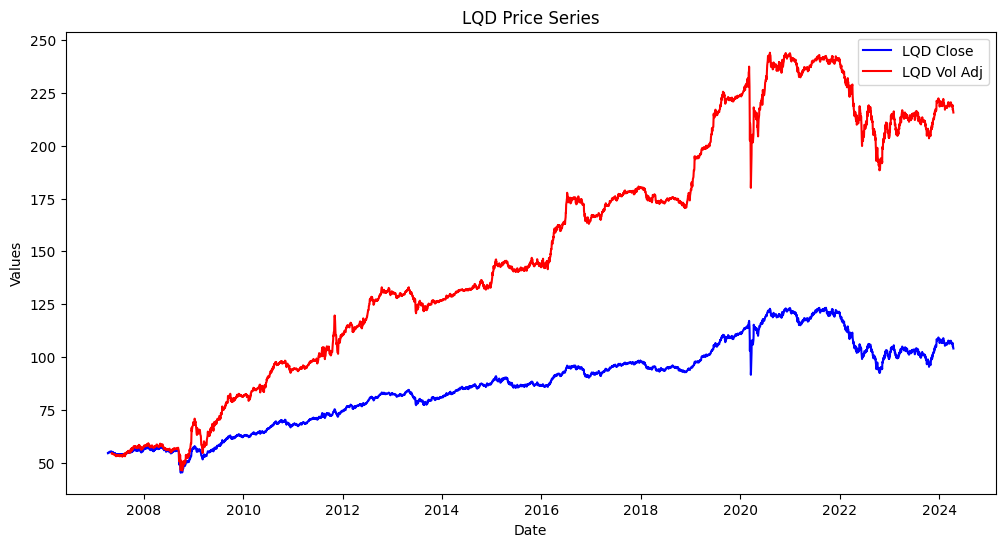

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['lqd_adjClose'], label='LQD Close', color='blue')
plt.plot(df.index, df['lqd_ret_adj_series'], label='LQD Vol Adj', color='red')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('LQD Price Series')
plt.legend()
plt.show()

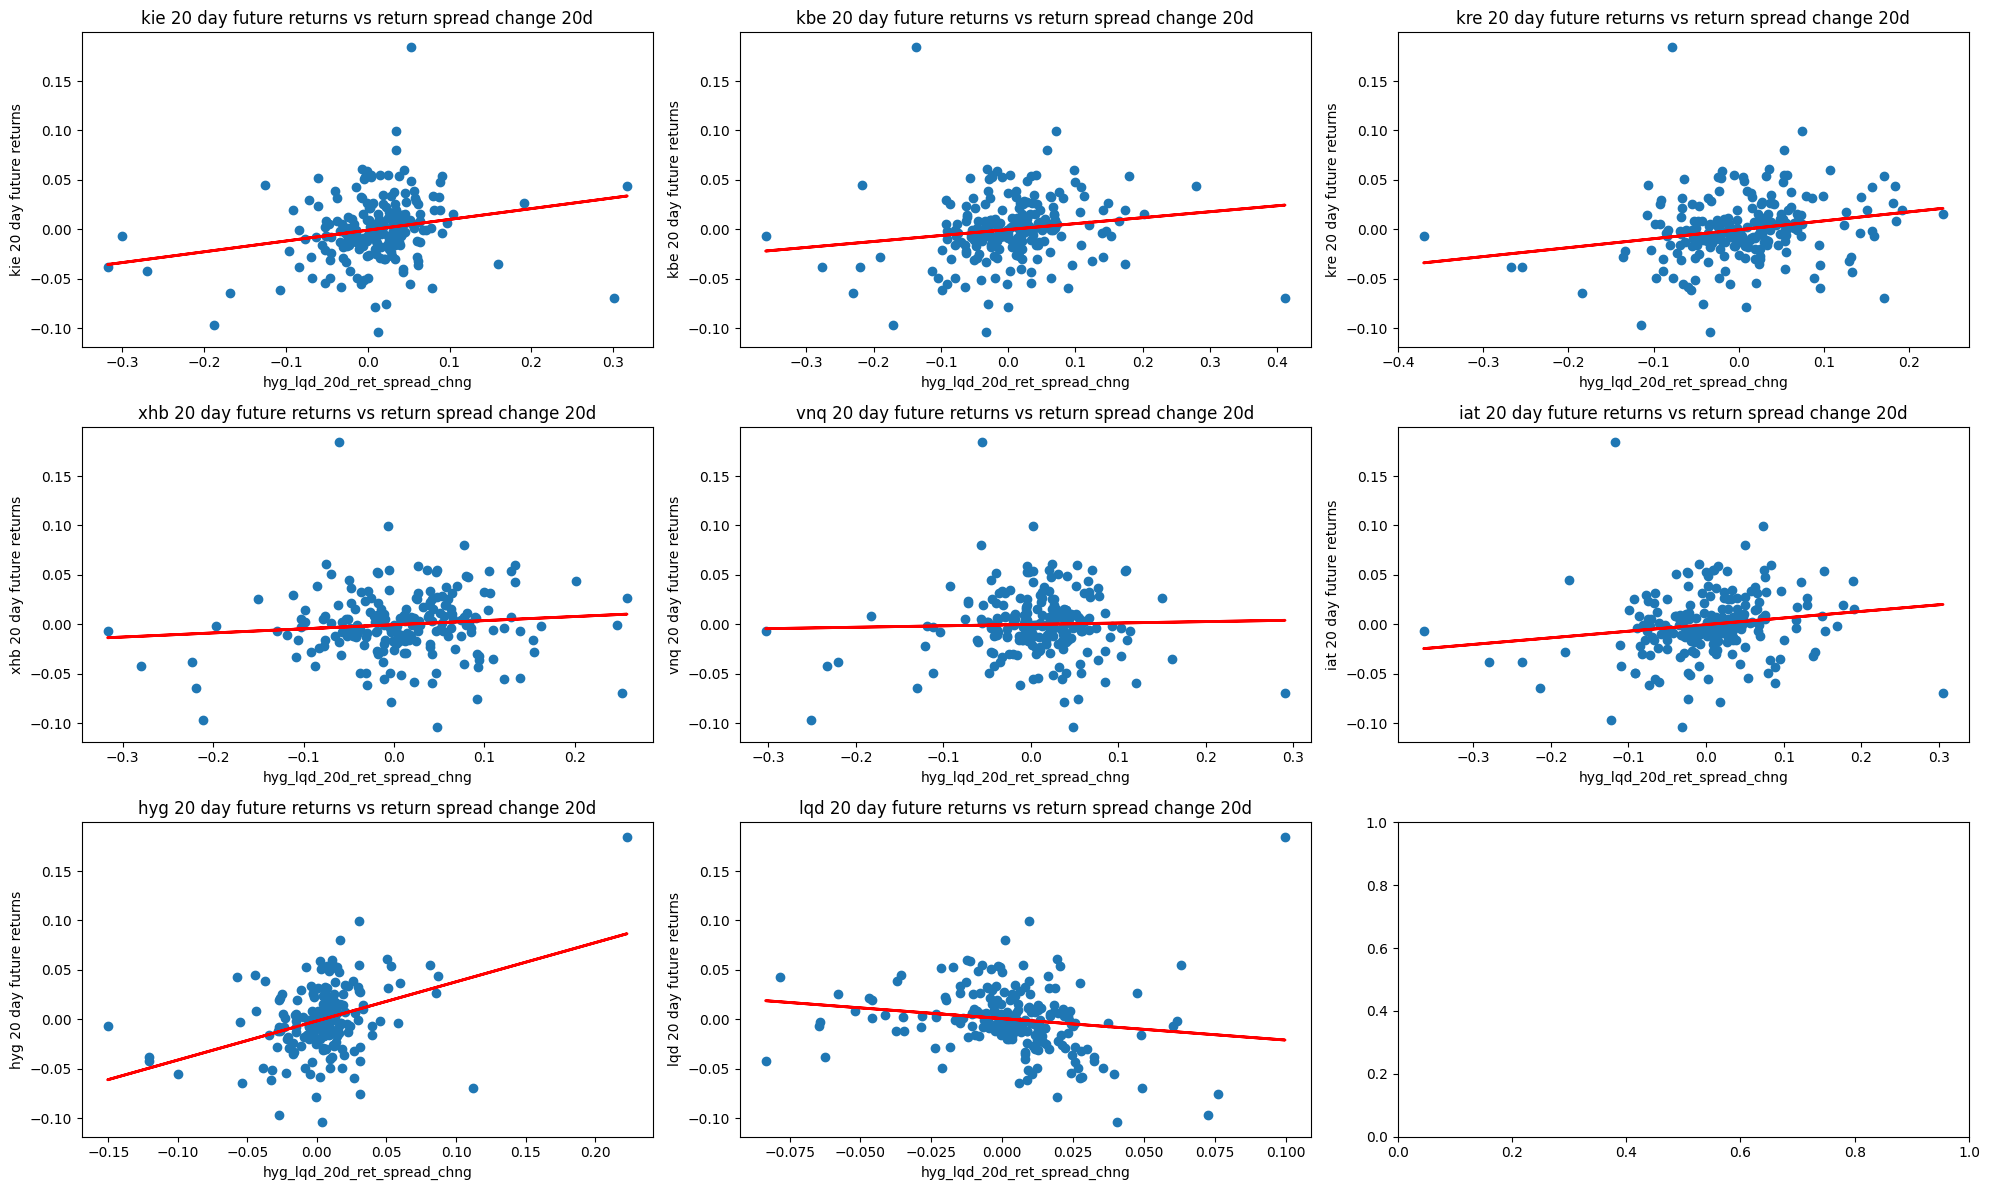

In [ ]:
etfs =[x.lower() for x in etfs]

def plot_columns_in_row_change(df, etf_list, days):
    df.dropna(inplace=True)
    num_plots = len(etf_list)
    num_rows = math.ceil(num_plots / 3)
    fig, axs = plt.subplots(num_rows, 3, figsize=(20, 4 * num_rows))

    for i, etf in enumerate(etf_list):
        row_index = i // 3
        col_index = i % 3

        x = df[etf+f'_ret_{days}d_future']
        y = df[f'hyg_lqd_{days}d_ret_spread_chng']

        axs[row_index, col_index].scatter(x, y)

        slope, intercept = np.polyfit(x, y, 1)
        reg_line = slope * x + intercept

        axs[row_index, col_index].plot(x, reg_line, color='red', linewidth=2)

        axs[row_index, col_index].set_title(f'{etf} {days} day future returns vs return spread change {days}d')
        axs[row_index, col_index].set_ylabel(f'{etf} {days} day future returns')
        axs[row_index, col_index].set_xlabel(f'hyg_lqd_{days}d_ret_spread_chng')

    plt.tight_layout()
    plt.show()

plot_columns_in_row_change(df, etfs, 20)

In [ ]:
def plot_columns_in_row(df, etf_list, days):
    df.dropna(inplace=True)
    num_plots = len(etf_list)
    num_rows = math.ceil(num_plots / 3)
    fig, axs = plt.subplots(num_rows, 3, figsize=(20, 4 * num_rows))

    for i, etf in enumerate(etf_list):
        row_index = i // 3
        col_index = i % 3

        x = df[etf+f'_ret_{days}d_future']
        y = df[f'hyg_lqd_{days}d_ret_spread']

        axs[row_index, col_index].scatter(x, y)

        # Calculate the regression line
        slope, intercept = np.polyfit(x, y, 1)
        reg_line = slope * x + intercept

        axs[row_index, col_index].plot(x, reg_line, color='red', linewidth=2)  # Add the regression line

        axs[row_index, col_index].set_title(f'{etf} {days} day future returns vs return spread {days}d')
        axs[row_index, col_index].set_ylabel(f'{etf} {days} day future returns')
        axs[row_index, col_index].set_xlabel(f'return_spread_{days}d')

    plt.tight_layout()
    plt.show()

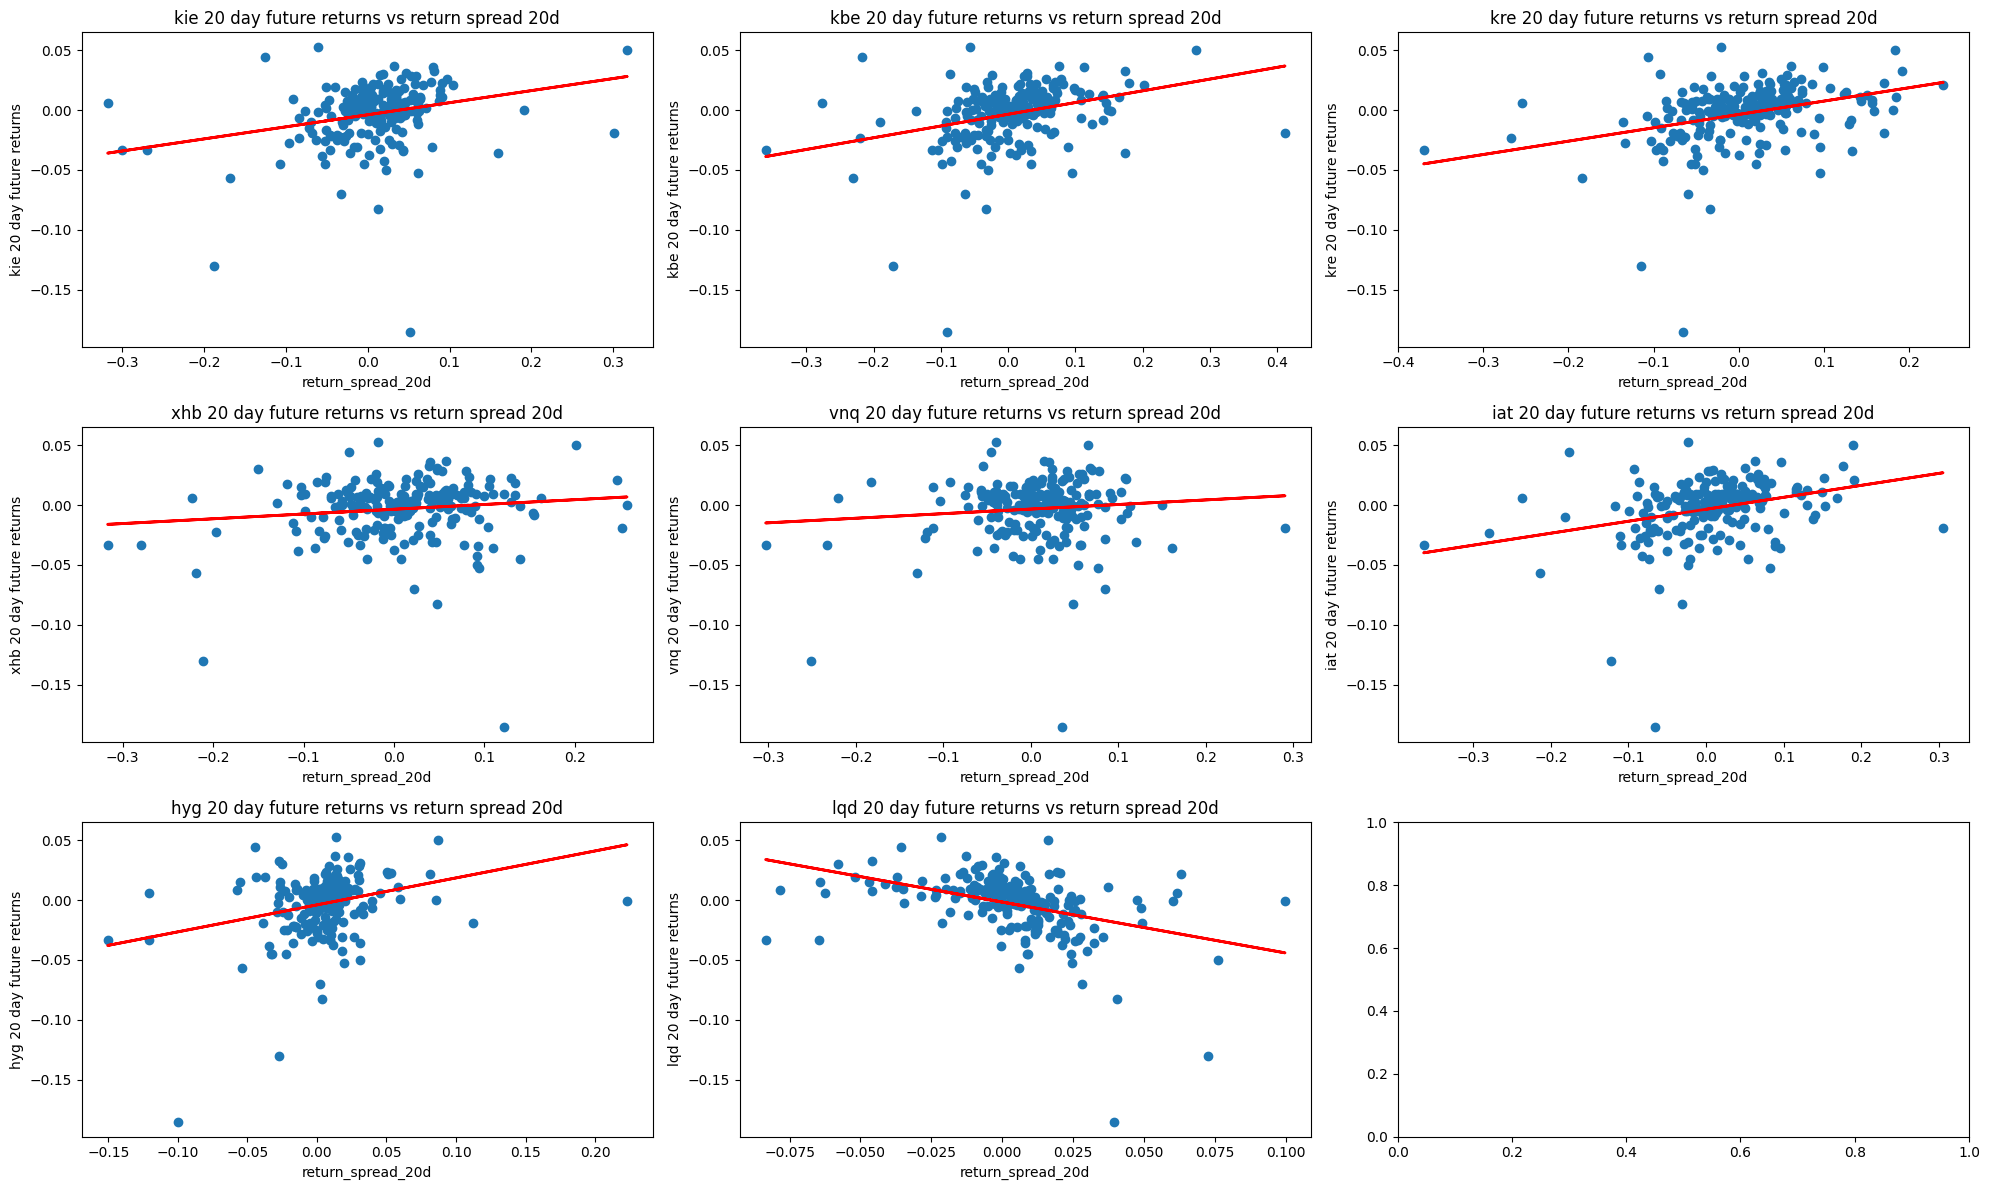

In [ ]:
plot_columns_in_row(df, etfs, 20)

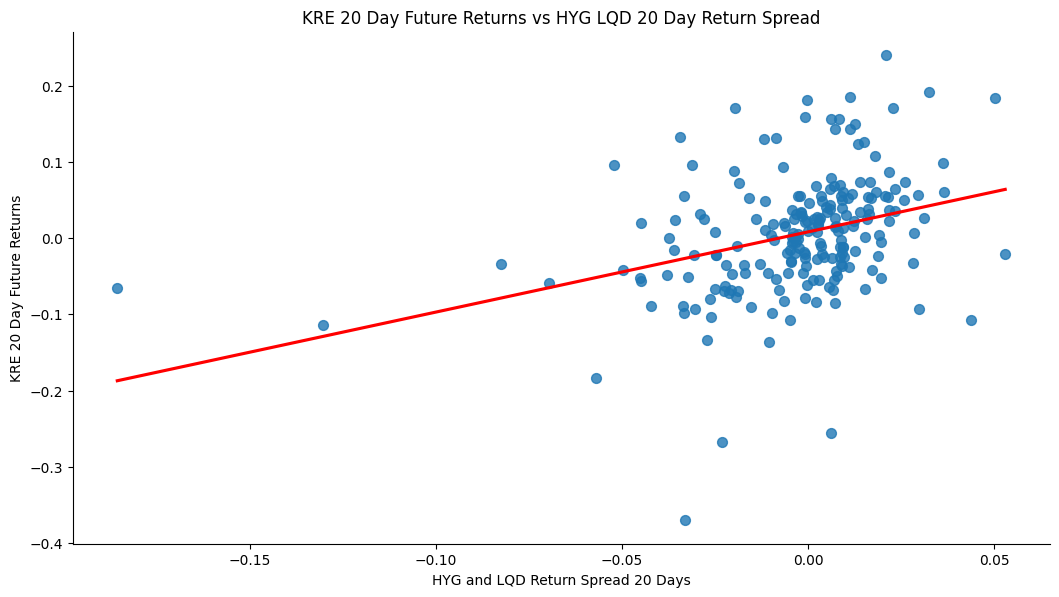

In [ ]:
sns.lmplot(x= 'hyg_lqd_20d_ret_spread', y= 'kre_ret_20d_future', data= df, ci= None, scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('KRE 20 Day Future Returns vs HYG LQD 20 Day Return Spread')
plt.xlabel('HYG and LQD Return Spread 20 Days')
plt.ylabel('KRE 20 Day Future Returns')
plt.gcf().set_size_inches(12, 6)
plt.show()

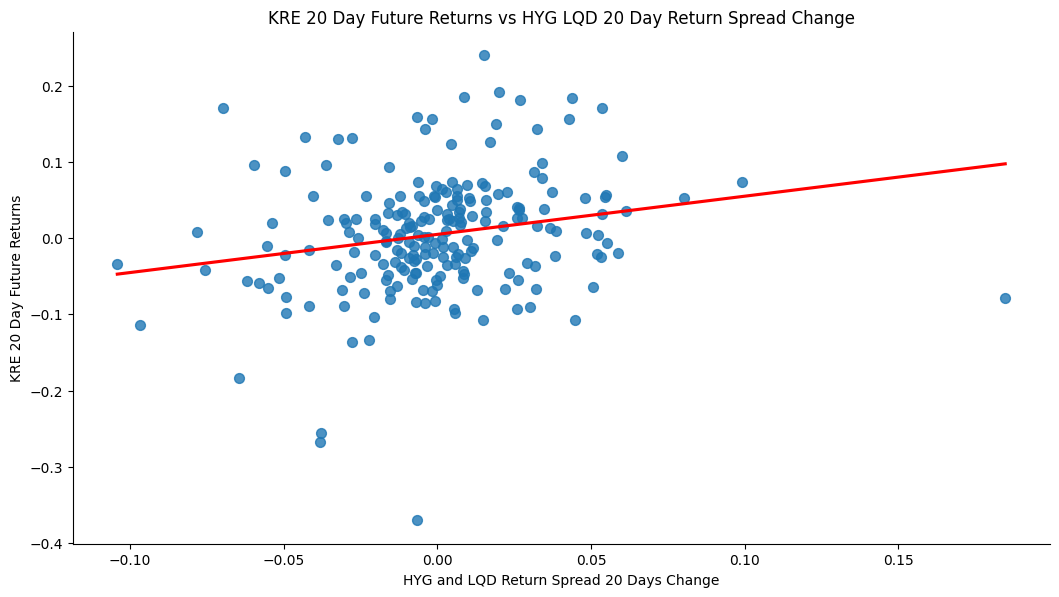

In [ ]:
sns.lmplot(x= 'hyg_lqd_20d_ret_spread_chng', y= 'kre_ret_20d_future', data= df, ci= None, scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('KRE 20 Day Future Returns vs HYG LQD 20 Day Return Spread Change')
plt.xlabel('HYG and LQD Return Spread 20 Days Change')
plt.ylabel('KRE 20 Day Future Returns')
plt.gcf().set_size_inches(12, 6)
plt.show()

In [ ]:
def make_summary(df,x_col, y_col):
  X = sm.add_constant(df[x_col])
  model = sm.OLS(df[y_col], X).fit()
  print(model.summary())


In [ ]:
ret_columns = [col for col in df.columns if col.endswith('_ret_20d_future')]
df.dropna(inplace=True)

for i in ret_columns:
  make_summary(df, 'hyg_lqd_20d_ret_spread', i)
  make_summary(df, 'hyg_lqd_20d_ret_spread_chng', i)

                            OLS Regression Results                            
Dep. Variable:     kie_ret_20d_future   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     15.71
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           0.000101
Time:                        02:05:40   Log-Likelihood:                 281.14
No. Observations:                 212   AIC:                            -558.3
Df Residuals:                     210   BIC:                            -551.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
def get_r_2(df,x_col, y_col):
  X = sm.add_constant(df[x_col])
  model = sm.OLS(df[y_col], X).fit()
  print(f'The R^2 for {y_col} and {x_col} is {model.rsquared}')

for i in ret_columns:
  get_r_2(df, 'hyg_lqd_20d_ret_spread', i)
  get_r_2(df, 'hyg_lqd_20d_ret_spread_chng', i)

The R^2 for kie_ret_20d_future and hyg_lqd_20d_ret_spread is 0.06960238133208707
The R^2 for kie_ret_20d_future and hyg_lqd_20d_ret_spread_chng is 0.04794340209327663
The R^2 for kbe_ret_20d_future and hyg_lqd_20d_ret_spread is 0.10264908357120361
The R^2 for kbe_ret_20d_future and hyg_lqd_20d_ret_spread_chng is 0.022761827763516984
The R^2 for kre_ret_20d_future and hyg_lqd_20d_ret_spread is 0.1172621576993067
The R^2 for kre_ret_20d_future and hyg_lqd_20d_ret_spread_chng is 0.04523084265126842
The R^2 for xhb_ret_20d_future and hyg_lqd_20d_ret_spread is 0.015923280935446482
The R^2 for xhb_ret_20d_future and hyg_lqd_20d_ret_spread_chng is 0.010141096981543418
The R^2 for vnq_ret_20d_future and hyg_lqd_20d_ret_spread is 0.009434985636843307
The R^2 for vnq_ret_20d_future and hyg_lqd_20d_ret_spread_chng is 0.0007665413364312812
The R^2 for iat_ret_20d_future and hyg_lqd_20d_ret_spread is 0.09193351181425202
The R^2 for iat_ret_20d_future and hyg_lqd_20d_ret_spread_chng is 0.02414177610

#Calculating 40 day future returns


In [ ]:
for i in list(df1.columns):
  df1[i[:3].lower()+'_ret'] = df1[i[:3].lower()+'_adjClose'].pct_change()
  df1[i[:3].lower()+'_ret_40d_future'] = df1[i[:3].lower()+'_adjClose'].pct_change(40).shift(-40) #make future returns
  df1[i[:3].lower()+'_ret_40d_future'] = df1[i[:3].lower()+'_ret_40d_future'][::40] #ensure there is no overlapping data
df1

,kie_adjClose,kbe_adjClose,kre_adjClose,xhb_adjClose,vnq_adjClose,iat_adjClose,hyg_adjClose,lqd_adjClose,kie_ret,kie_ret_40d_future,kbe_ret,kbe_ret_40d_future,kre_ret,kre_ret_40d_future,xhb_ret,xhb_ret_40d_future,vnq_ret,vnq_ret_40d_future,iat_ret,iat_ret_40d_future,hyg_ret,hyg_ret_40d_future,lqd_ret,lqd_ret_40d_future
date,,,,,,,,,,,,,,,,,,,,,,,,
2007-04-13 00:00:00+00:00,14.035181,38.026428,31.115048,27.712079,39.039829,32.576577,35.425159,54.563246,NaN,0.050871,NaN,0.026987,NaN,0.003832,NaN,0.007915,NaN,-0.0601,NaN,0.022782,NaN,0.005467,NaN,-0.016786
2007-04-16 00:00:00+00:00,14.189226,38.762311,31.698000,28.125440,39.088813,33.167684,35.411564,54.609443,0.010976,NaN,0.019352,NaN,0.018735,NaN,0.014916,NaN,0.001255,NaN,0.018145,NaN,-0.000384,NaN,0.000847,NaN
2007-04-17 00:00:00+00:00,14.289477,38.748807,31.664878,28.488186,39.598241,33.095438,35.394570,54.907154,0.007065,NaN,-0.000348,NaN,-0.001045,NaN,0.012897,NaN,0.013033,NaN,-0.002178,NaN,-0.000480,NaN,0.005452,NaN
2007-04-18 00:00:00+00:00,14.348161,39.329465,31.724498,29.078702,39.353324,33.430399,35.404766,54.922553,0.004107,NaN,0.014985,NaN,0.001883,NaN,0.020728,NaN,-0.006185,NaN,0.010121,NaN,0.000288,NaN,0.000280,NaN
2007-04-19 00:00:00+00:00,14.321264,39.288954,31.479393,29.061830,39.088813,33.423831,35.527121,54.958483,-0.001875,NaN,-0.001030,NaN,-0.007726,NaN,-0.000580,NaN,-0.006721,NaN,-0.000196,NaN,0.003456,NaN,0.000654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+00:00,50.110000,46.190000,49.350000,108.400000,85.970000,42.342848,76.402472,106.743850,-0.016680,NaN,0.002605,NaN,0.006527,NaN,-0.001014,NaN,0.013319,NaN,0.002347,NaN,0.002078,NaN,0.005139,NaN
2024-04-10 00:00:00+00:00,49.780000,44.280000,46.900000,104.380000,82.410000,40.637634,75.729148,105.225600,-0.006586,NaN,-0.041351,NaN,-0.049645,NaN,-0.037085,NaN,-0.041410,NaN,-0.040272,NaN,-0.008813,NaN,-0.014223,NaN
2024-04-11 00:00:00+00:00,48.430000,44.230000,46.940000,104.800000,82.690000,40.578150,75.659835,105.007290,-0.027119,NaN,-0.001129,NaN,0.000853,NaN,0.004024,NaN,0.003398,NaN,-0.001464,NaN,-0.000915,NaN,-0.002075,NaN


In [ ]:
df1['hyg_vol'] =  np.sqrt(np.log(df1['hyg_adjClose']).diff().rolling(40).var()*252)
df1['lqd_vol'] =  np.sqrt(np.log(df1['lqd_adjClose']).diff().rolling(40).var()*252)
df1['hyg_lqd_vol_ratio'] = df1['hyg_vol'] / df1['lqd_vol']
df1['lqd_ret_adj'] = 1 + (df1['lqd_ret'] * df1['hyg_lqd_vol_ratio'])
df1['lqd_ret_adj_series'] = df1['lqd_ret_adj'].cumprod()
df1['lqd_ret_adj_series'] =  df1['lqd_ret_adj_series'] * df1['lqd_adjClose'].iloc[0]
df1['lqd_adj_ret_40d'] = df1['lqd_ret_adj_series'].pct_change(40).shift(-40) #make future returns
df1['lqd_adj_ret_40d'] = df1['lqd_adj_ret_40d'][::40] #ensure no overlapping data
df1['hyg_lqd_40d_ret_spread'] = df1['hyg_ret_40d_future'] - df1['lqd_adj_ret_40d']
df1['hyg_lqd_40d_ret_spread_chng'] = df1['hyg_lqd_40d_ret_spread'].diff(40)
df1

,kie_adjClose,kbe_adjClose,kre_adjClose,xhb_adjClose,vnq_adjClose,iat_adjClose,hyg_adjClose,lqd_adjClose,kie_ret,kie_ret_40d_future,kbe_ret,kbe_ret_40d_future,kre_ret,kre_ret_40d_future,xhb_ret,xhb_ret_40d_future,vnq_ret,vnq_ret_40d_future,iat_ret,iat_ret_40d_future,hyg_ret,hyg_ret_40d_future,lqd_ret,lqd_ret_40d_future,hyg_vol,lqd_vol,hyg_lqd_vol_ratio,lqd_ret_adj,lqd_ret_adj_series,lqd_adj_ret_40d,hyg_lqd_40d_ret_spread,hyg_lqd_40d_ret_spread_chng
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-04-13 00:00:00+00:00,14.035181,38.026428,31.115048,27.712079,39.039829,32.576577,35.425159,54.563246,NaN,0.050871,NaN,0.026987,NaN,0.003832,NaN,0.007915,NaN,-0.0601,NaN,0.022782,NaN,0.005467,NaN,-0.016786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-16 00:00:00+00:00,14.189226,38.762311,31.698000,28.125440,39.088813,33.167684,35.411564,54.609443,0.010976,NaN,0.019352,NaN,0.018735,NaN,0.014916,NaN,0.001255,NaN,0.018145,NaN,-0.000384,NaN,0.000847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-17 00:00:00+00:00,14.289477,38.748807,31.664878,28.488186,39.598241,33.095438,35.394570,54.907154,0.007065,NaN,-0.000348,NaN,-0.001045,NaN,0.012897,NaN,0.013033,NaN,-0.002178,NaN,-0.000480,NaN,0.005452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-18 00:00:00+00:00,14.348161,39.329465,31.724498,29.078702,39.353324,33.430399,35.404766,54.922553,0.004107,NaN,0.014985,NaN,0.001883,NaN,0.020728,NaN,-0.006185,NaN,0.010121,NaN,0.000288,NaN,0.000280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-19 00:00:00+00:00,14.321264,39.288954,31.479393,29.061830,39.088813,33.423831,35.527121,54.958483,-0.001875,NaN,-0.001030,NaN,-0.007726,NaN,-0.000580,NaN,-0.006721,NaN,-0.000196,NaN,0.003456,NaN,0.000654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 00:00:00+00:00,50.110000,46.190000,49.350000,108.400000,85.970000,42.342848,76.402472,106.743850,-0.016680,NaN,0.002605,NaN,0.006527,NaN,-0.001014,NaN,0.013319,NaN,0.002347,NaN,0.002078,NaN,0.005139,NaN,0.043959,0.061891,0.710260,1.003650,206.902053,NaN,NaN,NaN
2024-04-10 00:00:00+00:00,49.780000,44.280000,46.900000,104.380000,82.410000,40.637634,75.729148,105.225600,-0.006586,NaN,-0.041351,NaN,-0.049645,NaN,-0.037085,NaN,-0.041410,NaN,-0.040272,NaN,-0.008813,NaN,-0.014223,NaN,0.049172,0.071639,0.686383,0.990237,204.882144,NaN,NaN,NaN
2024-04-11 00:00:00+00:00,48.430000,44.230000,46.940000,104.800000,82.690000,40.578150,75.659835,105.007290,-0.027119,NaN,-0.001129,NaN,0.000853,NaN,0.004024,NaN,0.003398,NaN,-0.001464,NaN,-0.000915,NaN,-0.002075,NaN,0.044623,0.066275,0.673305,0.998603,204.595944,NaN,NaN,NaN


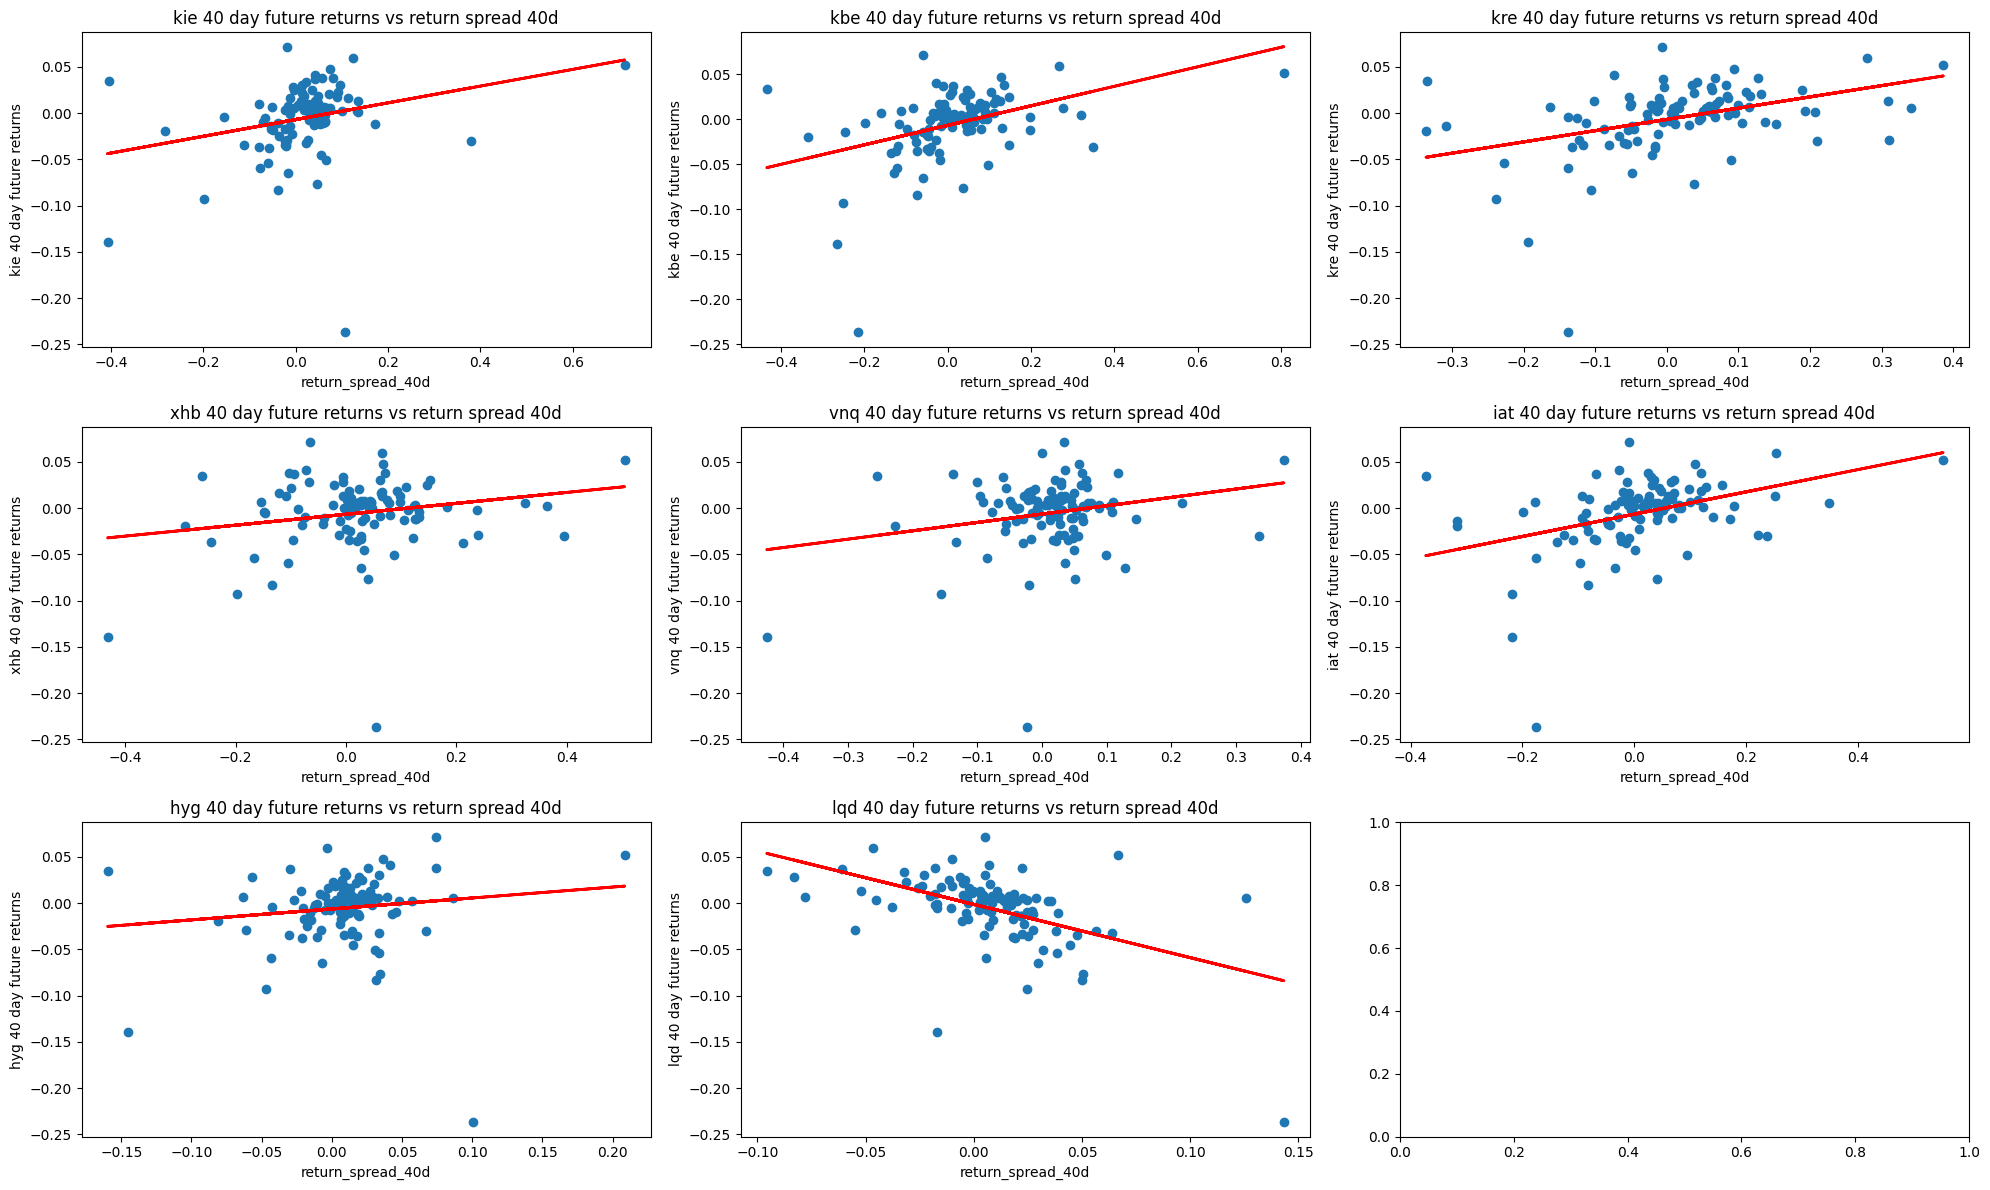

In [ ]:
plot_columns_in_row(df1, etfs, 40)

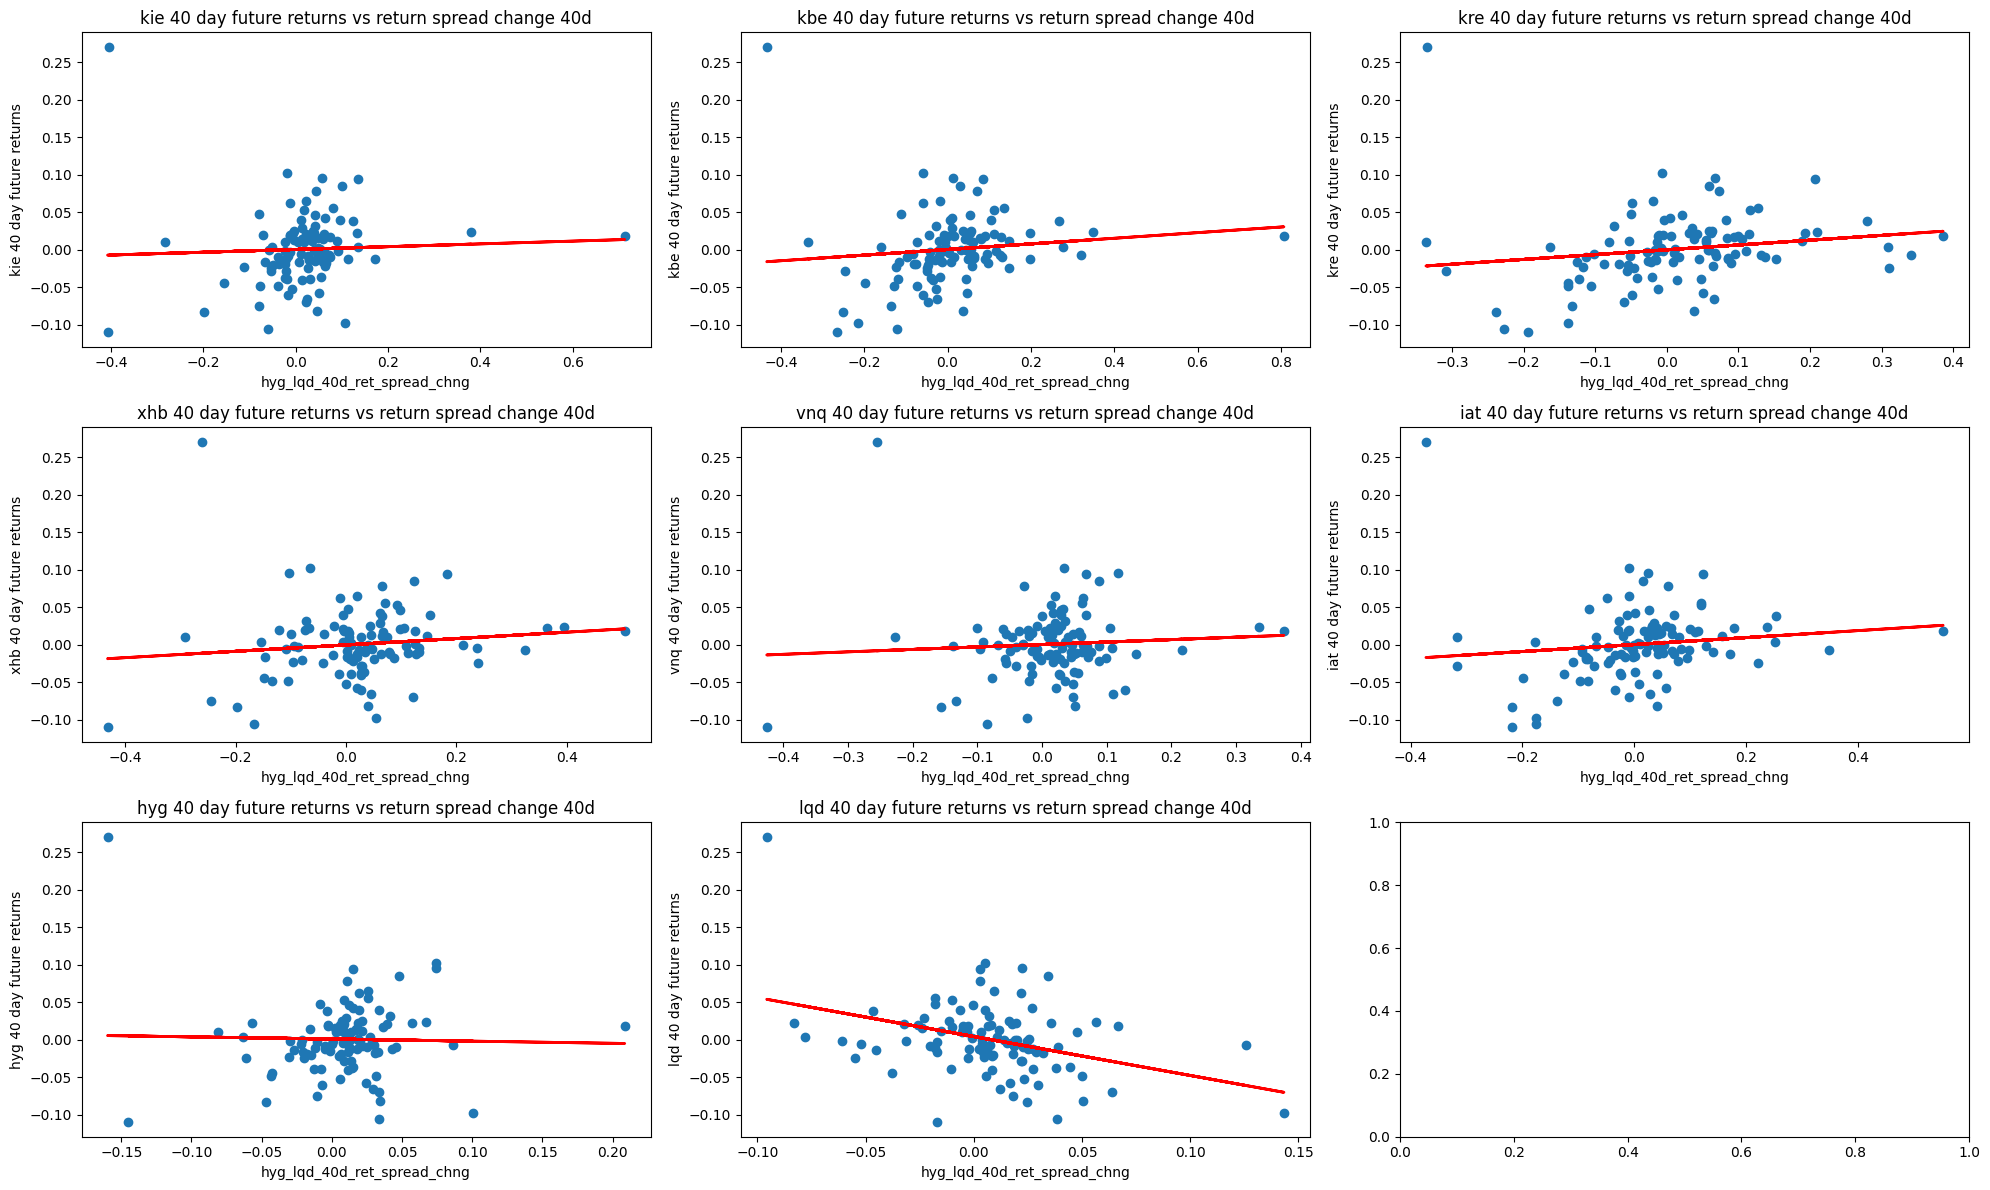

In [ ]:
def plot_columns_in_row_change(df, etf_list, days):
    df.dropna(inplace=True)
    num_plots = len(etf_list)
    num_rows = math.ceil(num_plots / 3)
    fig, axs = plt.subplots(num_rows, 3, figsize=(20, 4 * num_rows))

    for i, etf in enumerate(etf_list):
        row_index = i // 3
        col_index = i % 3

        x = df[etf+f'_ret_{days}d_future']
        y = df[f'hyg_lqd_{days}d_ret_spread_chng']

        axs[row_index, col_index].scatter(x, y)

        # Calculate the regression line
        slope, intercept = np.polyfit(x, y, 1)
        reg_line = slope * x + intercept

        axs[row_index, col_index].plot(x, reg_line, color='red', linewidth=2)  # Add the regression line

        axs[row_index, col_index].set_title(f'{etf} {days} day future returns vs return spread change {days}d')
        axs[row_index, col_index].set_ylabel(f'{etf} {days} day future returns')
        axs[row_index, col_index].set_xlabel(f'hyg_lqd_{days}d_ret_spread_chng')

    plt.tight_layout()
    plt.show()
plot_columns_in_row_change(df1, etfs, 40)

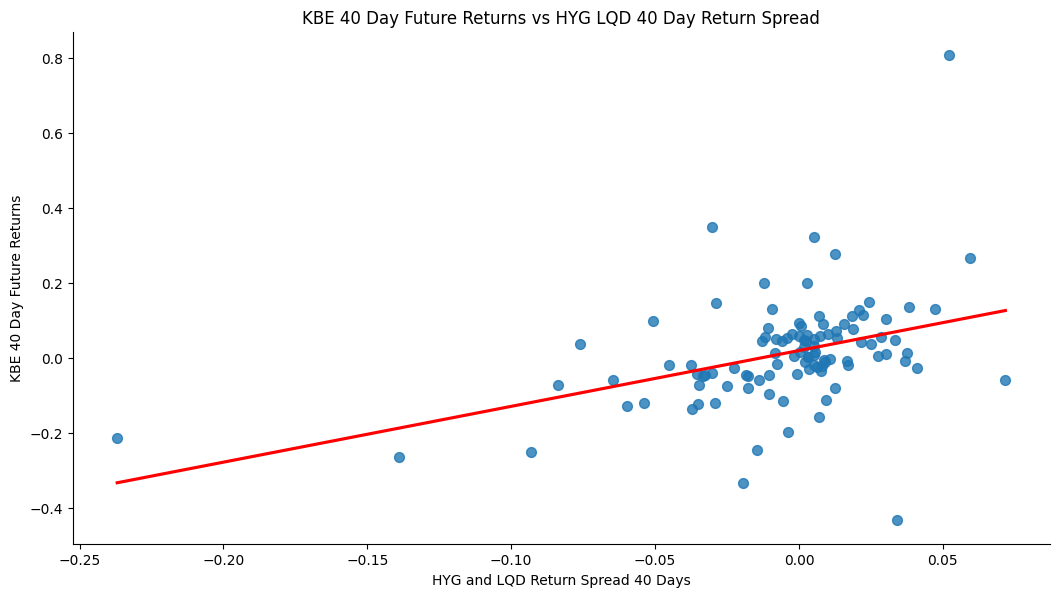

In [ ]:
sns.lmplot(x= 'hyg_lqd_40d_ret_spread', y= 'kbe_ret_40d_future', data= df1, ci= None, scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('KBE 40 Day Future Returns vs HYG LQD 40 Day Return Spread')
plt.xlabel('HYG and LQD Return Spread 40 Days')
plt.ylabel('KBE 40 Day Future Returns')
plt.gcf().set_size_inches(12, 6)
plt.show()

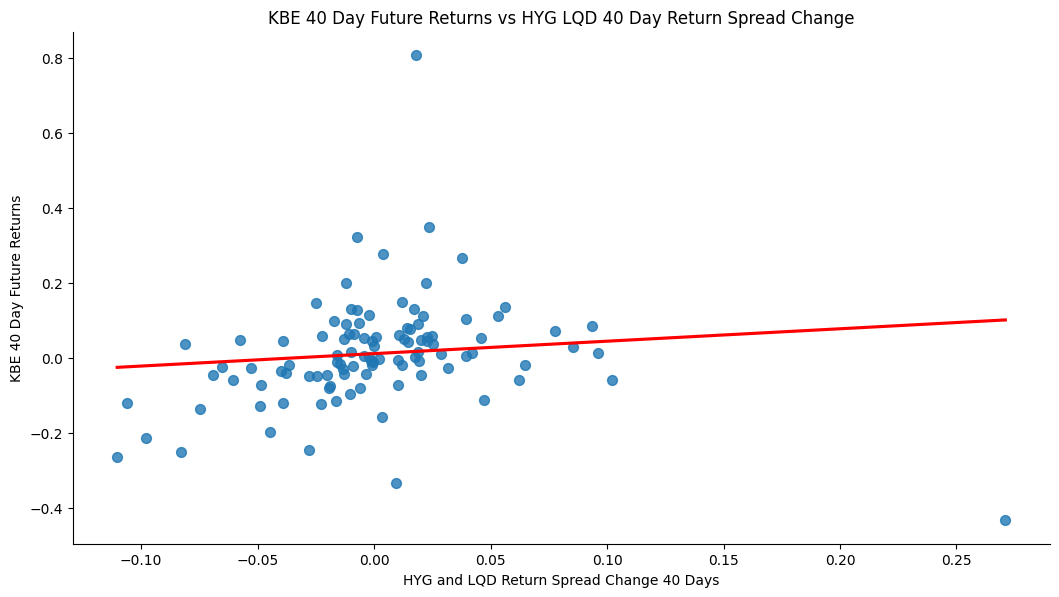

In [ ]:
sns.lmplot(x= 'hyg_lqd_40d_ret_spread_chng', y= 'kbe_ret_40d_future', data= df1, ci= None, scatter_kws={'s':50}, line_kws={'color': 'red'})
plt.title('KBE 40 Day Future Returns vs HYG LQD 40 Day Return Spread Change')
plt.xlabel('HYG and LQD Return Spread Change 40 Days')
plt.ylabel('KBE 40 Day Future Returns')
plt.gcf().set_size_inches(12, 6)
plt.show()

In [ ]:
ret_columns = [col for col in df1.columns if col.endswith('_ret_40d_future')]
df1.dropna(inplace=True)

for i in ret_columns:
  make_summary(df1, 'hyg_lqd_40d_ret_spread', i)
  make_summary(df1, 'hyg_lqd_40d_ret_spread_chng', i)

                            OLS Regression Results                            
Dep. Variable:     kie_ret_40d_future   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     8.296
Date:                Sun, 23 Jun 2024   Prob (F-statistic):            0.00483
Time:                        02:05:56   Log-Likelihood:                 80.708
No. Observations:                 105   AIC:                            -157.4
Df Residuals:                     103   BIC:                            -152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
for i in ret_columns:
  get_r_2(df1, 'hyg_lqd_40d_ret_spread', i)
  get_r_2(df1, 'hyg_lqd_40d_ret_spread_chng', i)

The R^2 for kie_ret_40d_future and hyg_lqd_40d_ret_spread is 0.07454283003363704
The R^2 for kie_ret_40d_future and hyg_lqd_40d_ret_spread_chng is 0.002025380387735143
The R^2 for kbe_ret_40d_future and hyg_lqd_40d_ret_spread is 0.16155819864903154
The R^2 for kbe_ret_40d_future and hyg_lqd_40d_ret_spread_chng is 0.01244159377647247
The R^2 for kre_ret_40d_future and hyg_lqd_40d_ret_spread is 0.1549563566743839
The R^2 for kre_ret_40d_future and hyg_lqd_40d_ret_spread_chng is 0.027743862976570277
The R^2 for xhb_ret_40d_future and hyg_lqd_40d_ret_spread is 0.03921729964778109
The R^2 for xhb_ret_40d_future and hyg_lqd_40d_ret_spread_chng is 0.013111069184170154
The R^2 for vnq_ret_40d_future and hyg_lqd_40d_ret_spread is 0.04833673200858846
The R^2 for vnq_ret_40d_future and hyg_lqd_40d_ret_spread_chng is 0.004073923902309984
The R^2 for iat_ret_40d_future and hyg_lqd_40d_ret_spread is 0.1533557413106047
The R^2 for iat_ret_40d_future and hyg_lqd_40d_ret_spread_chng is 0.01473633277153

#Testing Change Over Time

In [ ]:
mid = len(df) // 2
df_past = df[:mid+1]
df_curr = df[mid+1:]
for i in etfs:
  ks_stat, p_value = stats.ks_2samp(df_past[i+'_ret_20d_future'], df_curr[i+'_ret_20d_future'])
  print(f'P-value distribution of returns for {i} 20 days: {p_value}')

P-value distribution of returns for kie 20 days: 0.4421471996300333
P-value distribution of returns for kbe 20 days: 0.41616812437411976
P-value distribution of returns for kre 20 days: 0.5888431967201546
P-value distribution of returns for xhb 20 days: 0.4151019945692033
P-value distribution of returns for vnq 20 days: 0.784390313122615
P-value distribution of returns for iat 20 days: 0.5912876514671701
P-value distribution of returns for hyg 20 days: 0.5975471596667246
P-value distribution of returns for lqd 20 days: 0.12210270879173468


In [ ]:
mid1 = len(df1) // 2
df1_past = df1[:mid1+1]
df1_curr = df1[mid1+1:]
print(len(df1_past))
print(len(df1_curr))
for i in etfs:
  ks_stat, p_value = stats.ks_2samp(df1_past[i+'_ret_40d_future'], df1_curr[i+'_ret_40d_future'])
  print(f'P-value distribution of returns for {i} 40 days: {p_value}')

53
52
P-value distribution of returns for kie 40 days: 0.25682354225934756
P-value distribution of returns for kbe 40 days: 0.7215190836065163
P-value distribution of returns for kre 40 days: 0.9468272167331683
P-value distribution of returns for xhb 40 days: 0.6943860352414372
P-value distribution of returns for vnq 40 days: 0.28730365852670064
P-value distribution of returns for iat 40 days: 0.9110660773076787
P-value distribution of returns for hyg 40 days: 0.25682354225934756
P-value distribution of returns for lqd 40 days: 0.14701471168641284


#Running Chow Test

In [ ]:
def linear_residuals(X, y):

    # fits the linear model
    model = lr().fit(X, y)

    # creates a dataframe with the predicted y in a column called y_hat
    summary_result = pd.DataFrame(columns = ['y_hat'])
    yhat_list = [float(i[0]) for i in np.ndarray.tolist(model.predict(X))]
    summary_result['y_hat'] = yhat_list
    # saves the actual y values in the y_actual column
    summary_result['y_actual'] = y.values
    # calculates the residuals
    summary_result['residuals'] = summary_result.y_actual - summary_result.y_hat
    # squares the residuals
    summary_result['residuals_sq'] = summary_result.residuals ** 2

    return(summary_result)



# defines a function to return the sum of squares of a linear regression, where X is a
# pandas dataframe of the independent variables and y is a pandas dataframe of the dependent
# variable
def calculate_RSS(X, y):

    # calls the linear_residual function
    resid_data = linear_residuals(X, y)
    # calculates the sum of squared resiudals
    rss = resid_data.residuals_sq.sum()

    # returns the sum of squared residuals
    return(rss)



# defines a function to return the p-value from a Chow Test
def ChowTest(X, y, last_index_in_model_1, first_index_in_model_2):

    # gets the RSS for the entire period
    rss_pooled = calculate_RSS(X, y)

    # splits the X and y dataframes and gets the rows from the first row in the dataframe
    # to the last row in the model 1 testing period and then calculates the RSS
    X1 = X.loc[:last_index_in_model_1]
    y1 = y.loc[:last_index_in_model_1]
    rss1 = calculate_RSS(X1, y1)

    # splits the X and y dataframes and gets the rows from the first row in the model 2
    # testing period to the last row in the dataframe and then calculates the RSS
    X2 = X.loc[first_index_in_model_2:]
    y2 = y.loc[first_index_in_model_2:]
    rss2 = calculate_RSS(X2, y2)

    # gets the number of independent variables, plus 1 for the constant in the regression
    k = X.shape[1] + 1
    # gets the number of observations in the first period
    N1 = X1.shape[0]
    # gets the number of observations in the second period
    N2 = X2.shape[0]

    # calculates the numerator of the Chow Statistic
    numerator = (rss_pooled - (rss1 + rss2)) / k
    # calculates the denominator of the Chow Statistic
    denominator = (rss1 + rss2) / (N1 + N2 - 2 * k)

    # calculates the Chow Statistic
    Chow_Stat = numerator / denominator

    # Chow statistics are distributed in a F-distribution with k and N1 + N2 - 2k degrees of
    # freedom
    from scipy.stats import f

    # calculates the p-value by subtracting 1 by the cumulative probability at the Chow
    # statistic from an F-distribution with k and N1 + N2 - 2k degrees of freedom
    p_value = 1 - f.cdf(Chow_Stat, dfn = 5, dfd = (N1 + N2 - 2 * k))

    # saves the Chow_State and p_value in a tuple
    result = (Chow_Stat, p_value)

    # returns the p-value
    return(result)

In [ ]:
df_copy = df.copy()
df_copy['index'] = range(len(df_copy))
df_copy = df_copy.set_index(['index'])
for i in etfs:
  chow_stat, p_value = ChowTest(df_copy[['hyg_lqd_20d_ret_spread']], df_copy[[i+'_ret_20d_future']], mid, mid+1)
  print(f'ETF: {i}_ret_20d_future, Chow Statistic: {chow_stat}, p-value: {p_value}')

ETF: kie_ret_20d_future, Chow Statistic: 0.1578245890188471, p-value: 0.9774592123983332
ETF: kbe_ret_20d_future, Chow Statistic: 2.226658263283535, p-value: 0.05292388793399361
ETF: kre_ret_20d_future, Chow Statistic: 3.5120585884762985, p-value: 0.004540383100955614
ETF: xhb_ret_20d_future, Chow Statistic: 0.712057723991265, p-value: 0.615005017437528
ETF: vnq_ret_20d_future, Chow Statistic: 0.7648107264425364, p-value: 0.5761211635800749
ETF: iat_ret_20d_future, Chow Statistic: 3.0687779507191504, p-value: 0.010753229862218272
ETF: hyg_ret_20d_future, Chow Statistic: 1.5015365442774296, p-value: 0.1906888421689119
ETF: lqd_ret_20d_future, Chow Statistic: 2.2885733851150776, p-value: 0.04720765247192216


In [ ]:
for i in etfs:
  chow_stat, p_value = ChowTest(df_copy[['hyg_lqd_20d_ret_spread_chng']], df_copy[[i+'_ret_20d_future']], mid1, mid+1)
  print(f'ETF: {i}_ret_20d_future, Chow Statistic: {chow_stat}, p-value: {p_value}')

ETF: kie_ret_20d_future, Chow Statistic: 6.3006202184799065, p-value: 2.386625037675838e-05
ETF: kbe_ret_20d_future, Chow Statistic: 8.640858655354902, p-value: 3.0721655641663403e-07
ETF: kre_ret_20d_future, Chow Statistic: 11.05106668522609, p-value: 4.160938149588844e-09
ETF: xhb_ret_20d_future, Chow Statistic: 11.69477072358813, p-value: 1.362830293061279e-09
ETF: vnq_ret_20d_future, Chow Statistic: 12.005679112002579, p-value: 7.988248951207311e-10
ETF: iat_ret_20d_future, Chow Statistic: 9.732417123067572, p-value: 4.275350151683455e-08
ETF: hyg_ret_20d_future, Chow Statistic: 13.028291185520168, p-value: 1.4098633371872893e-10
ETF: lqd_ret_20d_future, Chow Statistic: 12.854175874140388, p-value: 1.8896517683941738e-10


In [ ]:
df1_copy = df1.copy()
df1_copy['index'] = range(len(df1_copy))
df1_copy = df1_copy.set_index(['index'])
for i in etfs:
  chow_stat, p_value = ChowTest(df1_copy[['hyg_lqd_40d_ret_spread']], df1_copy[[i+'_ret_40d_future']], mid1, mid1+1)
  print(f'ETF: {i}_ret_40d_future, Chow Statistic: {chow_stat}, p-value: {p_value}')

ETF: kie_ret_40d_future, Chow Statistic: 0.047986434095419736, p-value: 0.9985772733691869
ETF: kbe_ret_40d_future, Chow Statistic: 0.2643911513455048, p-value: 0.9315256427963122
ETF: kre_ret_40d_future, Chow Statistic: 0.9779174900863752, p-value: 0.4350694512541504
ETF: xhb_ret_40d_future, Chow Statistic: 0.38813355764854846, p-value: 0.8559374796881756
ETF: vnq_ret_40d_future, Chow Statistic: 2.1758230959085307, p-value: 0.06264099849009663
ETF: iat_ret_40d_future, Chow Statistic: 0.3805696659232872, p-value: 0.8610556041747461
ETF: hyg_ret_40d_future, Chow Statistic: 0.6175849751736069, p-value: 0.6866575411323237
ETF: lqd_ret_40d_future, Chow Statistic: 2.8737601818646725, p-value: 0.01813474031010487


In [ ]:
for i in etfs:
  chow_stat, p_value = ChowTest(df1_copy[['hyg_lqd_40d_ret_spread_chng']], df1_copy[[i+'_ret_40d_future']], mid1, mid1+1)
  print(f'ETF: {i}_ret_40d_future, Chow Statistic: {chow_stat}, p-value: {p_value}')

ETF: kie_ret_40d_future, Chow Statistic: 0.025333496176159553, p-value: 0.9996994880986962
ETF: kbe_ret_40d_future, Chow Statistic: 0.5640529972125056, p-value: 0.727314597426107
ETF: kre_ret_40d_future, Chow Statistic: 0.5976801208366609, p-value: 0.7017702750414401
ETF: xhb_ret_40d_future, Chow Statistic: 0.16615958912248543, p-value: 0.9744384404467423
ETF: vnq_ret_40d_future, Chow Statistic: 0.2584219702346124, p-value: 0.9346377410876078
ETF: iat_ret_40d_future, Chow Statistic: 0.5610638927174908, p-value: 0.7295826756103105
ETF: hyg_ret_40d_future, Chow Statistic: 0.04868851545122792, p-value: 0.9985265824210069
ETF: lqd_ret_40d_future, Chow Statistic: 0.44121015812546466, p-value: 0.8187429621806597
